In [33]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
import numpy as np

In [54]:
df = pd.read_csv('drug200.csv')
df['Drug'] = df['Drug'].apply(lambda x: 'drugY' if x == 'DrugY' else x)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [47]:
df[df['Drug'] == 'drugA']

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
17,43,M,HIGH,HIGH,13.972,drugA
36,32,M,HIGH,NORMAL,9.445,drugA
46,37,F,HIGH,HIGH,13.091,drugA
61,24,M,HIGH,NORMAL,9.475,drugA
66,29,M,HIGH,HIGH,12.856,drugA
76,36,F,HIGH,HIGH,11.198,drugA
78,19,F,HIGH,HIGH,13.313,drugA
83,38,F,HIGH,NORMAL,11.326,drugA
100,31,M,HIGH,NORMAL,11.871,drugA
101,45,F,HIGH,HIGH,12.854,drugA


In [48]:
df[df['Drug'] == 'drugB']

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
31,74,M,HIGH,HIGH,9.567,drugB
41,58,F,HIGH,NORMAL,14.239,drugB
54,68,F,HIGH,NORMAL,10.189,drugB
56,65,M,HIGH,NORMAL,11.340,drugB
64,60,F,HIGH,HIGH,13.303,drugB
70,70,M,HIGH,HIGH,13.967,drugB
80,60,M,HIGH,HIGH,13.934,drugB
85,59,M,HIGH,HIGH,13.935,drugB
108,72,M,HIGH,NORMAL,9.677,drugB
124,53,F,HIGH,NORMAL,12.495,drugB


BP = Blood Pressure Levels 


Na_to_K = Sodium to potassium Ration in Blood

In [55]:
drugs = sorted(list(set(df['Drug'])))
for i in range(len(drugs)):
    df.loc[df['Drug'] == drugs[i], 'Drug'] = i
df['Cholesterol'] = df['Cholesterol'].apply(lambda i: 0 if i == 'NORMAL' else 1)
df['Sex'] = df['Sex'].apply(lambda i: 0 if i == 'F' else 1)
dp = list(set(df['BP']))
for i in range(len(dp)):
    df.loc[df['BP'] == dp[i], 'BP'] = i
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,1,25.355,4
1,47,1,1,1,13.093,2
2,47,1,1,1,10.114,2
3,28,0,2,1,7.798,3
4,61,0,1,1,18.043,4
...,...,...,...,...,...,...
195,56,0,1,1,11.567,2
196,16,1,1,1,12.006,2
197,52,1,2,1,9.894,3
198,23,1,2,0,14.020,3


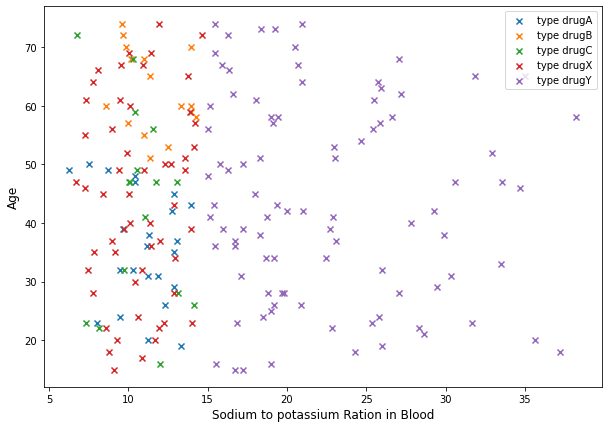

In [56]:
fig, ax = plt.subplots(figsize = (10, 7))
for i in range(len(drugs)):
    ax.scatter(df['Na_to_K'][df['Drug'] == i], df['Age'][df['Drug'] == i], marker = 'x', label = f'type {drugs[i]}')
ax.set_xlabel('Sodium to potassium Ration in Blood', fontsize = 12)
ax.set_ylabel('Age', fontsize = 12)
ax.legend()
plt.show()

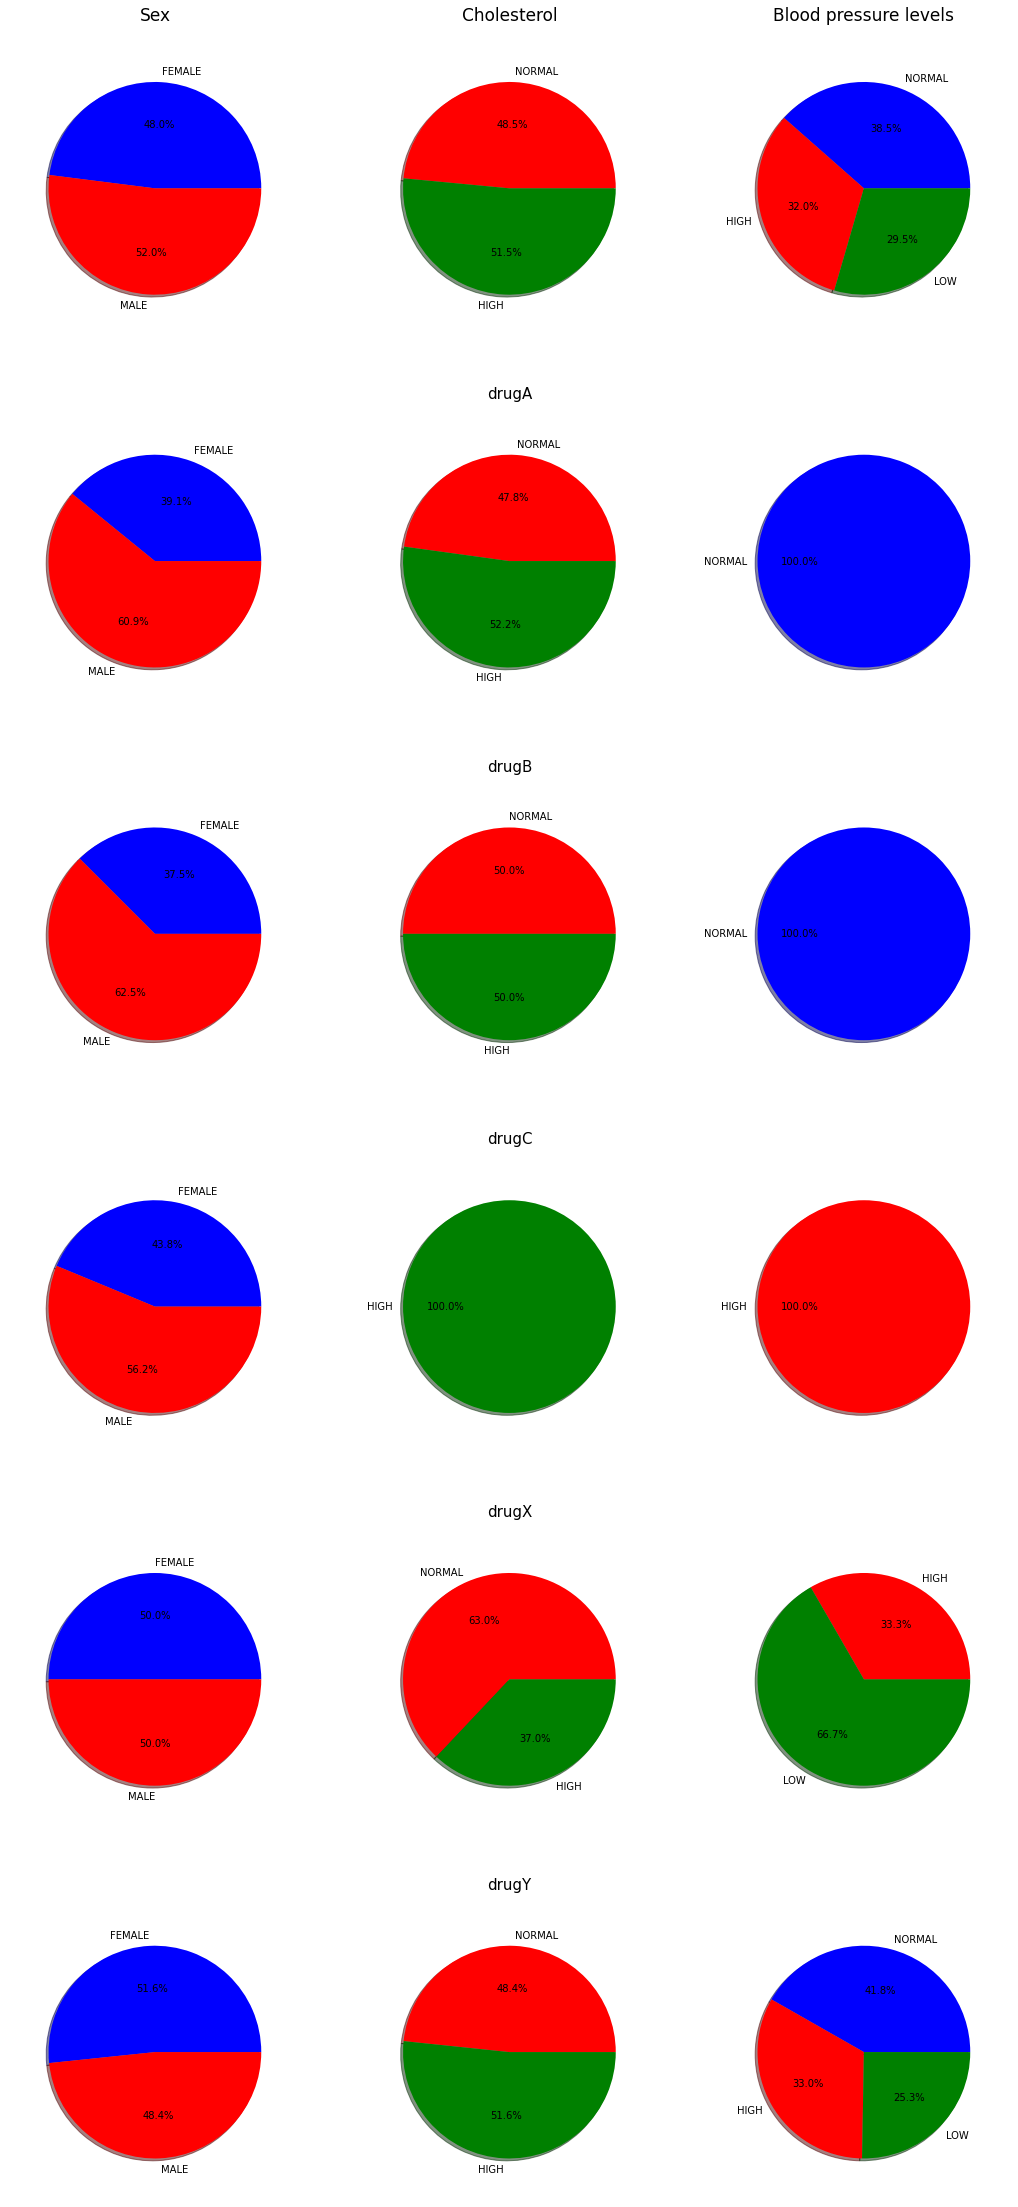

In [57]:
plt.subplots(figsize = (18, 40))
plt.subplot(6, 3, 1)
plt.title('Sex', pad = 20, fontsize = 17)
rad = 0.9
colors = ['blue', 'red', 'green']
plt.pie([len(df[df['Sex'] == 0]), len(df[df['Sex'] == 1])], labels = ['FEMALE', 'MALE'], autopct = '%1.1f%%', radius = rad,
        colors = colors[:2], shadow = True)
plt.subplot(6, 3, 2)
plt.title('Cholesterol', pad = 20, fontsize = 17)
plt.pie([len(df[df['Cholesterol'] == 0]), len(df[df['Cholesterol'] == 1])], labels = ['NORMAL', 'HIGH'], 
        autopct = '%1.1f%%', radius = rad, colors = colors[1:], shadow = True)
plt.subplot(6, 3, 3)
plt.title('Blood pressure levels', pad = 20, fontsize = 17)
plt.pie([len(df[df['BP'] == 0]), len(df[df['BP'] == 1]), len(df[df['BP'] == 2])], labels = ['NORMAL', 'HIGH', 'LOW'], 
        autopct = '%1.1f%%', radius = rad, colors = colors, shadow = True)
for i in range(len(drugs)):
    df_i = df[df['Drug'] == i]
    plt.subplot(6, 3, (i + 1)*4 - i)
    plt.pie([len(df_i[df_i['Sex'] == 0]), len(df_i[df_i['Sex'] == 1])], labels = ['FEMALE', 'MALE'], autopct = '%1.1f%%', 
            radius = rad, shadow = True, colors = colors[:2])
    plt.subplot(6, 3, (i + 1)*5 - 2*i)
    plt.title(f'{drugs[i]}', pad = 15, fontsize = 15)
    l_0, l_1 = len(df_i[df_i['Cholesterol'] == 0]), len(df_i[df_i['Cholesterol'] == 1])
    if l_0 == 0:
        plt.pie([l_1], labels = ['HIGH'], autopct = '%1.1f%%', radius = rad, colors = colors[2], shadow = True)
    elif l_1 == 0:
        plt.pie([l_0], labels = ['NORMAL'], autopct = '%1.1f%%', radius = rad, colors = colors[1], shadow = True)
    else:
        plt.pie([l_0, l_1], labels = ['NORMAL', 'HIGH'], autopct = '%1.1f%%', radius = rad, colors = colors[1:], 
                shadow = True)
    plt.subplot(6, 3, (i + 1)*6 - 3*i)
    l_0, l_1, l_2 = len(df_i[df_i['BP'] == 0]), len(df_i[df_i['BP'] == 1]), len(df_i[df_i['BP'] == 2])
    if l_0 == 0 and l_1 == 0:
        plt.pie([l_2], labels = ['LOW'], autopct = '%1.1f%%', radius = rad, colors = colors[2], shadow = True)
    elif l_0 == 0 and l_2 == 0:
        plt.pie([l_1], labels = ['HIGH'], autopct = '%1.1f%%', radius = rad, colors = colors[1], shadow = True)
    elif l_1 == 0 and l_2 == 0:
        plt.pie([l_0], labels = ['NORMAL'], autopct = '%1.1f%%', radius = rad, colors = colors[0], shadow = True)
    elif l_0 == 0:
        plt.pie([l_1, l_2], labels = ['HIGH', 'LOW'], autopct = '%1.1f%%', radius = rad, colors = colors[1:], shadow = True)
    elif l_1 == 0:
        plt.pie([l_0, l_2], labels = ['NORMAL', 'LOW'], autopct = '%1.1f%%', radius = rad, colors = [colors[0], colors[2]],
                shadow = True)
    elif l_2 == 0:
        plt.pie([l_0, l_1], labels = ['NORMAL', 'HIGH'], autopct = '%1.1f%%', radius = rad, colors = colors[:2], 
                shadow = True)
    else:
        plt.pie([l_0, l_1, l_2], labels = ['NORMAL', 'HIGH', 'LOW'], autopct = '%1.1f%%', radius = rad, colors = colors, 
                shadow = True)
plt.show()

In [58]:
x_train, x_test, y_train, y_test = train_test_split(df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values, 
                                                    df['Drug'].values, train_size = 0.5)
x_train = x_train.astype('float')
y_train = y_train.astype('int')
x_test = x_test.astype('float')
y_test = y_test.astype('int')

accuracy =  0.99


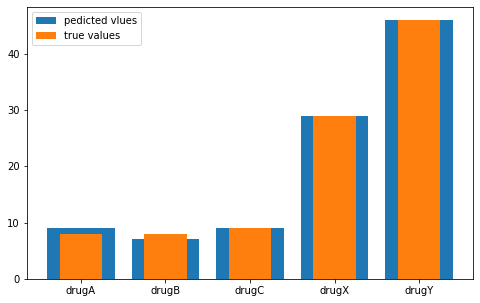

In [59]:
my_tree = DecisionTreeClassifier(criterion = 'gini')
my_tree.fit(x_train, y_train)
y_pred = my_tree.predict(x_test)
print('accuracy = ', accuracy_score(y_test, y_pred))
plt.subplots(figsize = (8, 5))
plt.bar(drugs, [dict(Counter(y_pred))[i] for i in range(len(drugs))], label = 'pedicted vlues')
plt.bar(drugs, [dict(Counter(y_test))[i] for i in range(len(drugs))], width = 0.5, label = 'true values')
plt.legend()
plt.show()

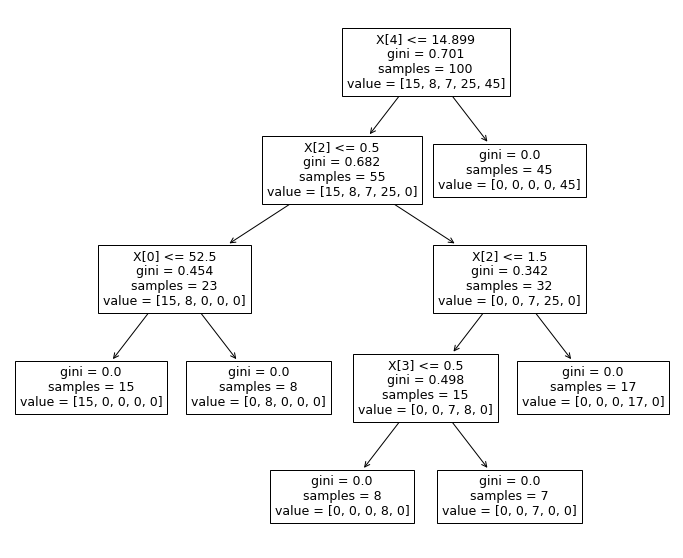

In [60]:
plt.figure(figsize = (12, 10))
tree.plot_tree(my_tree)
plt.show()

In [32]:
for i in range(2, 15):
    forest = RandomForestClassifier(criterion = 'entropy', n_estimators = i)
    forest.fit(x_train, y_train)
    y_pred = forest.predict(x_test)
    print('Number of trees = ', i)
    print('accuracy = ', accuracy_score(y_test, y_pred))

Number of trees =  2
accuracy =  0.8
Number of trees =  3
accuracy =  0.91
Number of trees =  4
accuracy =  0.9
Number of trees =  5
accuracy =  0.97
Number of trees =  6
accuracy =  0.93
Number of trees =  7
accuracy =  0.95
Number of trees =  8
accuracy =  0.87
Number of trees =  9
accuracy =  0.92
Number of trees =  10
accuracy =  0.87
Number of trees =  11
accuracy =  0.96
Number of trees =  12
accuracy =  0.93
Number of trees =  13
accuracy =  0.89
Number of trees =  14
accuracy =  0.88
